<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/windelta_rolling_winter_SE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install energyquantified

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
def get_data_from_instance(identifier, issued, frequency):
    forecast = EQ.instances.get(
        identifier,
        issued=issued,
        tag='arome',                        # select forecast
        frequency=frequency,
        aggregation=Aggregation.AVERAGE,
        # ensembles=True                    # Include ensembles
    )
    df = forecast.to_dataframe()
   
    return df

In [7]:
from datetime import datetime, time

In [8]:
day_ahead_forecast_zero = EQ.instances.relative(
   'SE1 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2020, 12, 1, 0, 0, 0),
   end=dtdatetime(2020, 12, 31, 0, 0, 0),
   tag='arome',
   days_ahead=0,  # The day-ahead forecast (0 or higher allowed)
   time_of_day=time(0, 0),  # Issued at exactly 00:00
   frequency=Frequency.PT1H
)
day_ahead_zero=day_ahead_forecast_zero.to_dataframe()


In [9]:
day_ahead_zero

,SE1 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-12-01 01:00:00+01:00,616.62
2020-12-01 02:00:00+01:00,569.55
2020-12-01 03:00:00+01:00,509.33
2020-12-01 04:00:00+01:00,478.55
2020-12-01 05:00:00+01:00,520.88
...,...
2020-12-30 19:00:00+01:00,545.93


In [10]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'sE1 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2020, 12, 1, 0, 0, 0),
   end=dtdatetime(2020, 12, 31, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [11]:
day_ahead_twelve

,SE1 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-12-01 00:00:00+01:00,597.03
2020-12-01 01:00:00+01:00,559.17
2020-12-01 02:00:00+01:00,559.38
2020-12-01 03:00:00+01:00,523.70
2020-12-01 04:00:00+01:00,459.03
...,...
2020-12-30 19:00:00+01:00,572.33


In [12]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,SE1 Wind Power Production MWh/h 15min Forecast_x,SE1 Wind Power Production MWh/h 15min Forecast_y
,,
,,
date,,
2020-12-01 01:00:00+01:00,616.62,559.17
2020-12-01 02:00:00+01:00,569.55,559.38
2020-12-01 03:00:00+01:00,509.33,523.70
2020-12-01 04:00:00+01:00,478.55,459.03
2020-12-01 05:00:00+01:00,520.88,471.40
...,...,...
2020-12-30 19:00:00+01:00,545.93,572.33


In [13]:
df_comb.columns

MultiIndex([('SE1 Wind Power Production MWh/h 15min Forecast_x', '', ''),
            ('SE1 Wind Power Production MWh/h 15min Forecast_y', '', '')],
           )

In [15]:
df_comb['Wind Delta', '', '']= df_comb['SE1 Wind Power Production MWh/h 15min Forecast_x',''] - df_comb['SE1 Wind Power Production MWh/h 15min Forecast_y','']

In [16]:
df_comb

,SE1 Wind Power Production MWh/h 15min Forecast_x,SE1 Wind Power Production MWh/h 15min Forecast_y,Wind Delta
,,,
,,,
date,,,
2020-12-01 01:00:00+01:00,616.62,559.17,57.45
2020-12-01 02:00:00+01:00,569.55,559.38,10.17
2020-12-01 03:00:00+01:00,509.33,523.70,-14.37
2020-12-01 04:00:00+01:00,478.55,459.03,19.52
2020-12-01 05:00:00+01:00,520.88,471.40,49.48
...,...,...,...
2020-12-30 19:00:00+01:00,545.93,572.33,-26.40


In [17]:
df_comb.columns

MultiIndex([('SE1 Wind Power Production MWh/h 15min Forecast_x', '', ''),
            ('SE1 Wind Power Production MWh/h 15min Forecast_y', '', ''),
            (                                      'Wind Delta', '', '')],
           )

In [18]:
df_comb.drop(['SE1 Wind Power Production MWh/h 15min Forecast_x', 'SE1 Wind Power Production MWh/h 15min Forecast_y'], axis=1, level=0 ,inplace=True)
df_comb

,Wind Delta
,
,
date,
2020-12-01 01:00:00+01:00,57.45
2020-12-01 02:00:00+01:00,10.17
2020-12-01 03:00:00+01:00,-14.37
2020-12-01 04:00:00+01:00,19.52
2020-12-01 05:00:00+01:00,49.48
...,...
2020-12-30 19:00:00+01:00,-26.40


In [19]:
df_comb.columns = ['_'.join(col) for col in df_comb.columns.values]

In [20]:
df_comb

,Wind Delta__
date,
2020-12-01 01:00:00+01:00,57.45
2020-12-01 02:00:00+01:00,10.17
2020-12-01 03:00:00+01:00,-14.37
2020-12-01 04:00:00+01:00,19.52
2020-12-01 05:00:00+01:00,49.48
...,...
2020-12-30 19:00:00+01:00,-26.40
2020-12-30 20:00:00+01:00,-40.32
2020-12-30 21:00:00+01:00,-89.88


In [21]:
df_comb.columns

Index(['Wind Delta__'], dtype='object')

In [23]:
spot=(pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro.csv', index_col = ["timestamp"], parse_dates=True).loc[:,"SE1_spot"])
imbalance = (pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro.csv', index_col = ["timestamp"], parse_dates=True).loc[:,"SE1_imbalance"])

In [24]:
spot=spot.to_frame()
imbalance= imbalance.to_frame()

In [25]:
spot

,SE1_spot
timestamp,
2018-02-01 00:00:00,0.02316
2018-02-01 01:00:00,0.02478
2018-02-01 02:00:00,0.02503
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-01-02 19:00:00,0.06229
2021-01-02 20:00:00,0.05636
2021-01-02 21:00:00,0.05525


In [26]:
imbalance

,SE1_imbalance
timestamp,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-01-02 19:00:00,0.04447
2021-01-02 20:00:00,0.05636
2021-01-02 21:00:00,0.05475


In [27]:
imbalance.tz_localize(None)

,SE1_imbalance
timestamp,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-01-02 19:00:00,0.04447
2021-01-02 20:00:00,0.05636
2021-01-02 21:00:00,0.05475


In [28]:
imbalance.index = pd.to_datetime(imbalance.index, utc=True).tz_convert('Europe/Stockholm')

In [29]:
imbalance

,SE1_imbalance
timestamp,
2018-02-01 01:00:00+01:00,0.00300
2018-02-01 02:00:00+01:00,0.00300
2018-02-01 03:00:00+01:00,0.00300
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02334
...,...
2021-01-02 20:00:00+01:00,0.04447
2021-01-02 21:00:00+01:00,0.05636
2021-01-02 22:00:00+01:00,0.05475


In [30]:
spot.tz_localize(None)

,SE1_spot
timestamp,
2018-02-01 00:00:00,0.02316
2018-02-01 01:00:00,0.02478
2018-02-01 02:00:00,0.02503
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-01-02 19:00:00,0.06229
2021-01-02 20:00:00,0.05636
2021-01-02 21:00:00,0.05525


In [31]:
spot.index = pd.to_datetime(spot.index, utc=True).tz_convert('Europe/Stockholm')

In [32]:
spot

,SE1_spot
timestamp,
2018-02-01 01:00:00+01:00,0.02316
2018-02-01 02:00:00+01:00,0.02478
2018-02-01 03:00:00+01:00,0.02503
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02684
...,...
2021-01-02 20:00:00+01:00,0.06229
2021-01-02 21:00:00+01:00,0.05636
2021-01-02 22:00:00+01:00,0.05525


In [33]:
df_comb.tz_convert(None)

,Wind Delta__
date,
2020-12-01 00:00:00,57.45
2020-12-01 01:00:00,10.17
2020-12-01 02:00:00,-14.37
2020-12-01 03:00:00,19.52
2020-12-01 04:00:00,49.48
...,...
2020-12-30 18:00:00,-26.40
2020-12-30 19:00:00,-40.32
2020-12-30 20:00:00,-89.88


In [35]:
df_comb.index = pd.to_datetime(df_comb.index, utc=True).tz_convert('Europe/Stockholm')

In [36]:
df_comb

,Wind Delta__
date,
2020-12-01 01:00:00+01:00,57.45
2020-12-01 02:00:00+01:00,10.17
2020-12-01 03:00:00+01:00,-14.37
2020-12-01 04:00:00+01:00,19.52
2020-12-01 05:00:00+01:00,49.48
...,...
2020-12-30 19:00:00+01:00,-26.40
2020-12-30 20:00:00+01:00,-40.32
2020-12-30 21:00:00+01:00,-89.88


In [37]:
df_plot = pd.merge(df_comb, spot , left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,SE1_spot
2020-12-01 01:00:00+01:00,57.45,0.01937
2020-12-01 02:00:00+01:00,10.17,0.01836
2020-12-01 03:00:00+01:00,-14.37,0.01834
2020-12-01 04:00:00+01:00,19.52,0.01816
2020-12-01 05:00:00+01:00,49.48,0.01866
...,...,...
2020-12-30 19:00:00+01:00,-26.40,0.02036
2020-12-30 20:00:00+01:00,-40.32,0.02061
2020-12-30 21:00:00+01:00,-89.88,0.01997
2020-12-30 22:00:00+01:00,-108.77,0.02070


In [38]:
df_plot = pd.merge(df_plot, imbalance, left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,SE1_spot,SE1_imbalance
2020-12-01 01:00:00+01:00,57.45,0.01937,0.01500
2020-12-01 02:00:00+01:00,10.17,0.01836,0.01500
2020-12-01 03:00:00+01:00,-14.37,0.01834,0.01500
2020-12-01 04:00:00+01:00,19.52,0.01816,0.01012
2020-12-01 05:00:00+01:00,49.48,0.01866,0.00950
...,...,...,...
2020-12-30 19:00:00+01:00,-26.40,0.02036,0.02036
2020-12-30 20:00:00+01:00,-40.32,0.02061,0.02061
2020-12-30 21:00:00+01:00,-89.88,0.01997,0.01997
2020-12-30 22:00:00+01:00,-108.77,0.02070,0.02070


In [39]:
df_plot.columns

Index(['Wind Delta__', 'SE1_spot', 'SE1_imbalance'], dtype='object')

In [41]:
df_plot['Direction']= df_plot['SE1_spot']-df_plot['SE1_imbalance']

In [42]:
df_plot

,Wind Delta__,SE1_spot,SE1_imbalance,Direction
2020-12-01 01:00:00+01:00,57.45,0.01937,0.01500,0.00437
2020-12-01 02:00:00+01:00,10.17,0.01836,0.01500,0.00336
2020-12-01 03:00:00+01:00,-14.37,0.01834,0.01500,0.00334
2020-12-01 04:00:00+01:00,19.52,0.01816,0.01012,0.00804
2020-12-01 05:00:00+01:00,49.48,0.01866,0.00950,0.00916
...,...,...,...,...
2020-12-30 19:00:00+01:00,-26.40,0.02036,0.02036,0.00000
2020-12-30 20:00:00+01:00,-40.32,0.02061,0.02061,0.00000
2020-12-30 21:00:00+01:00,-89.88,0.01997,0.01997,0.00000
2020-12-30 22:00:00+01:00,-108.77,0.02070,0.02070,0.00000


In [44]:
df_plot.drop(['SE1_spot', 'SE1_imbalance'], axis=1, inplace=True)

In [45]:
df_plot.index.name="Date"

In [46]:
df_plot

,Wind Delta__,Direction
Date,,
2020-12-01 01:00:00+01:00,57.45,0.00437
2020-12-01 02:00:00+01:00,10.17,0.00336
2020-12-01 03:00:00+01:00,-14.37,0.00334
2020-12-01 04:00:00+01:00,19.52,0.00804
2020-12-01 05:00:00+01:00,49.48,0.00916
...,...,...
2020-12-30 19:00:00+01:00,-26.40,0.00000
2020-12-30 20:00:00+01:00,-40.32,0.00000
2020-12-30 21:00:00+01:00,-89.88,0.00000


In [47]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [48]:
df_plot['Direction'] = df_plot['Direction'].apply(lambda x: x*1000)

In [49]:
df_plot

,Wind Delta__,Direction
Date,,
2020-12-01 01:00:00+01:00,57.45,4.37
2020-12-01 02:00:00+01:00,10.17,3.36
2020-12-01 03:00:00+01:00,-14.37,3.34
2020-12-01 04:00:00+01:00,19.52,8.04
2020-12-01 05:00:00+01:00,49.48,9.16
...,...,...
2020-12-30 19:00:00+01:00,-26.40,0.00
2020-12-30 20:00:00+01:00,-40.32,0.00
2020-12-30 21:00:00+01:00,-89.88,0.00


In [50]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [51]:
df_plot['Wind Delta__'].astype('float64')

Date
2020-12-01 01:00:00+01:00     57.45
2020-12-01 02:00:00+01:00     10.17
2020-12-01 03:00:00+01:00    -14.37
2020-12-01 04:00:00+01:00     19.52
2020-12-01 05:00:00+01:00     49.48
                              ...  
2020-12-30 19:00:00+01:00    -26.40
2020-12-30 20:00:00+01:00    -40.32
2020-12-30 21:00:00+01:00    -89.88
2020-12-30 22:00:00+01:00   -108.77
2020-12-30 23:00:00+01:00    -70.60
Name: Wind Delta__, Length: 700, dtype: float64

In [52]:
df_plot['Direction'].astype('float64')

Date
2020-12-01 01:00:00+01:00    4.37
2020-12-01 02:00:00+01:00    3.36
2020-12-01 03:00:00+01:00    3.34
2020-12-01 04:00:00+01:00    8.04
2020-12-01 05:00:00+01:00    9.16
                             ... 
2020-12-30 19:00:00+01:00    0.00
2020-12-30 20:00:00+01:00    0.00
2020-12-30 21:00:00+01:00    0.00
2020-12-30 22:00:00+01:00    0.00
2020-12-30 23:00:00+01:00    0.00
Name: Direction, Length: 700, dtype: float64

In [53]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

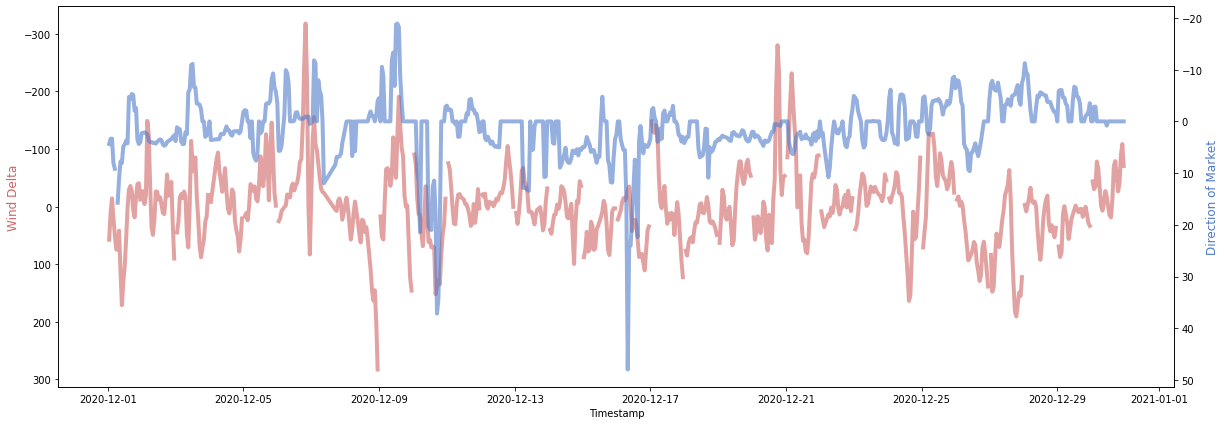

In [54]:
fig, ax1 = plt.subplots(figsize=[20,7])

x = df_plot.index
plt.xlabel("Timestamp")
plt.ylabel("Wind Delta", fontsize=12, color=red);
y1 = df_plot['Wind Delta__']
y2 = df_plot['Direction']

ax2 = ax1.twinx()

ax1.plot(x, y1, alpha=0.6, lw=4, color=red)
plt.ylabel("Direction of Market", fontsize=12, color=blue);
ax2.plot(x, y2, alpha=0.6, lw=4, color=blue)
ax1.invert_yaxis()
ax2.invert_yaxis()
#plt.autoscale();